# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [166]:
#Импортируем библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [167]:
#Загружаем данные из файла и выводим информацию о данных
data = pd.read_csv('Advertising.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [168]:
#Выводим описание статистических метрик данных
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [169]:
#Вроверим столбцы на пропуски
data.isnull().any()
#В данных отсутствуют пропуски

Unnamed: 0    False
TV            False
radio         False
newspaper     False
sales         False
dtype: bool

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [170]:
#Преобразуем данные в ndarray
X = data[['TV','radio','newspaper']].to_numpy()
y =data['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [171]:
#Добавляем единичный столбец и проверяем размерность данных
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print("Размерность X: ", X.shape, "Размерность y: ", y.shape)

Размерность X:  (200, 4) Размерность y:  (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [172]:
#Нормализуем данные
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [173]:
#Задаем константы
num_iter = 1000 #количество итераций
m = 200 # количество строк в матрице X
n = 4 # количество столбцов в матрице X
w = np.zeros((n,1)) #вектор размера nx1, состояющий из нулей

def coordinate_descent(X, y, n, num_iter):
    #задаем цикл по количеству заданных итераций
    for i in range(num_iter):
        #создаем массив для весов
        weights = []
        #задаем цикл по столбцам
        for k in range(n):
            h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
            w[k] = (X[:,k].T @ (y-h))
            cost = sum(((X @ w) - y) ** 2) / (len(y))
        weights.append(w)
    return weights, cost

result_weight , loss = coordinate_descent(X,y,n, num_iter)
print('Веса модели линейной регрессии: ', result_weight)


Веса модели линейной регрессии:  [array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [174]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print('Веса модели линейной регрессии библиотечным методом: ', model.coef_)

Веса модели линейной регрессии библиотечным методом:  [[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Веса модели линейной регрессии библиотечным методом и функцией вручную совпали.

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [189]:
X = data[['TV','radio','newspaper']].to_numpy()
y = data['sales'].values
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
print("Среднее: ", means, "Стандартное отклонение:", stds)


Среднее:  [147.0425  23.264   30.554 ] Стандартное отклонение: [85.63933176 14.80964564 21.72410606]


In [190]:
#Отмасштабированный признак
X = (X - means) / stds

**Добавим единичный столбец**

In [177]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [178]:
def mse(actual, pred): 
 actual, pred = np.array(actual), np.array(pred)
 return np.square(np.subtract(actual,pred)).mean()

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [179]:
#Создаем вектор средних значений y
y_pred = np.linspace(y.mean(),y.mean(),num = 200)

print('Средняя квадратичная ошибка с помощью библиотеки: ',mean_squared_error(y,y_pred))
print('Средняя квадратичная ошибка с помощью функции: ',mse(y,y_pred))

Средняя квадратичная ошибка с помощью библиотеки:  27.085743750000002
Средняя квадратичная ошибка с помощью функции:  27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [180]:
def lin_pred(X,w):
    return np.dot(X, w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [181]:
def toch_grad_step(X, y, w, train_ind, eta):
    grad0 = (np.sum(w * X[train_ind, :]) - y[train_ind]) / len(y)
    grad1 = X[train_ind, 1] * (np.sum(w * X[train_ind, :]) - y[train_ind]) / len(y)
    grad2 = X[train_ind, 2] * (np.sum(w * X[train_ind, :]) - y[train_ind]) / len(y)
    grad3 = X[train_ind, 3] * (np.sum(w * X[train_ind, :]) - y[train_ind]) / len(y)
    return  w - 2 * eta * np.array([grad0, grad1, grad2, grad3])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [182]:
def stochastic_gradient_descent(X, y, w_init, eta = 0.01, max_iter = 10000, 
                                min_weight_dist = 1e-8):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    seed = 42
    np.random.seed(seed)
    
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        tmp_weights = w
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])

        w = toch_grad_step(X, y, w, random_ind, eta)
        errors.append(mean_squared_error(lin_pred(X, w), y))
        
        weight_dist = np.linalg.norm(tmp_weights - w, 2)
        iter_num += 1
        
    return w, errors
    
    
    

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [183]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0,0,0,0]), eta=0.01, max_iter=1e5)

CPU times: user 4.68 s, sys: 24.5 ms, total: 4.7 s
Wall time: 4.7 s


Text(0, 0.5, 'MSE')

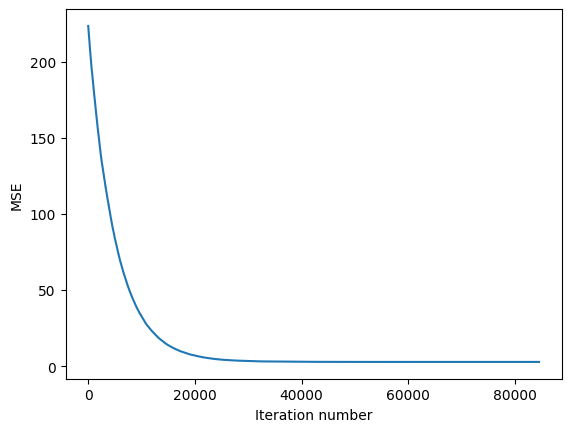

In [199]:
plt.plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number') #на оси Х количество итераций
ylabel('MSE') #на оси y ошибка MSE

Из графика видно,что до 20000 итерации среднеквадратичная ошибка падает. После 20000 итерации ошибка остается постоянной.

**Выведите вектор весов, к которому сошелся метод.**

In [195]:
print("Вектор весов, к которому сошелся метод: ", stoch_grad_desc_weights)

Вектор весов, к которому сошелся метод:  [ 1.40190566e+01  3.91069256e+00  2.78209808e+00 -8.10462217e-03]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [200]:
print("Cреднеквадратичная ошибка на последней итерации: ",stoch_errors_by_iter[-1])

Cреднеквадратичная ошибка на последней итерации:  2.7844125884067035
